# QT layouts

- There are 4 basic `layouts` available in Qt, which are listed in the following table.

  - There are three `positional layouts` available in `Qt`. The `QVBoxLayout`, `QHBoxLayout` and `QGridLayout`.
  - In addition there is also `QStackedLayout` which allows you to place widgets one on top of the other within the same space, yet showing only one layout at a time.

  <table>
    <thead>
      <tr>
        <th>Layout</th>
        <th>Behavior</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>QHBoxLayout</td>
        <td>Linear horizontal layout</td>
      </tr>
      <tr>
        <td>QVBoxLayout</td>
        <td>Linear vertical layout</td>
      </tr>
      <tr>
        <td>QGridLayout</td>
        <td>In indexable grid XxY</td>
      </tr>
      <tr>
        <td>QStackedLayout</td>
        <td>Stacked (z) in front of one another</td>
      </tr>
    </tbody>
  </table>


## `QVBoxLayout`

- With `QVBoxLayout` you arrange widgets one above the other linearly. Adding a widget adds it to the bottom of the column.

  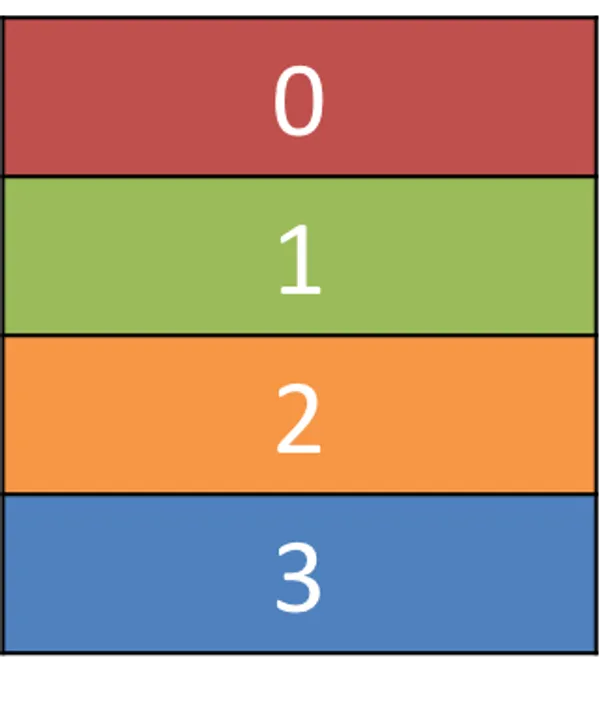

- Example

  ```python
  class MainWindow(QMainWindow):

      def __init__(self):
          super(MainWindow, self).__init__()

          self.setWindowTitle("My App")

          layout = QVBoxLayout()

          layout.addWidget(Color('red'))
          layout.addWidget(Color('green'))
          layout.addWidget(Color('blue'))

          widget = QWidget()
          widget.setLayout(layout)
          self.setCentralWidget(widget)
  ```


## `QHBoxLayout`

- `QHBoxLayout` is the same, except moving horizontally. Adding a widget adds it to the right hand side.

  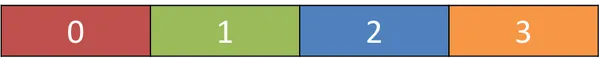

- Example

  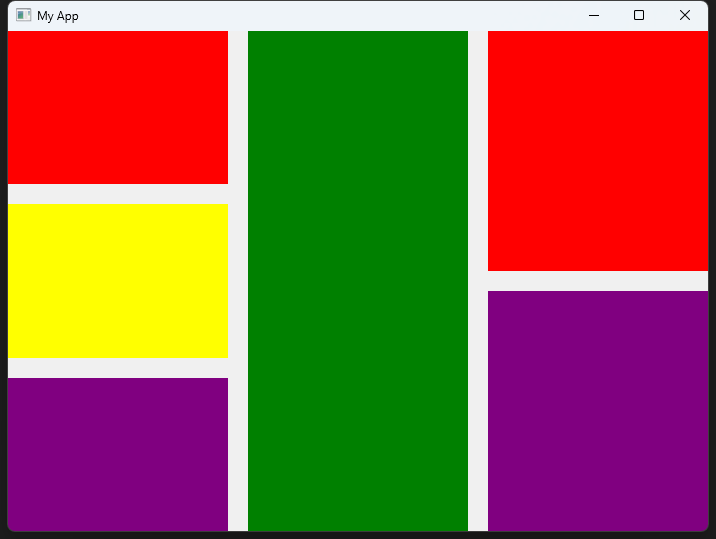

  ```python
  import sys
  from PyQt6.QtWidgets import QApplication, QMainWindow, QWidget, QHBoxLayout, QVBoxLayout
  from PyQt6.QtGui import QPalette, QColor

  class Color(QWidget):

      def __init__(self, color):
          super(Color, self).__init__()
          self.setAutoFillBackground(True)

          palette = self.palette()
          palette.setColor(QPalette.ColorRole.Window, QColor(color))
          self.setPalette(palette)

  class MainWindow(QMainWindow):

      def __init__(self):
          super(MainWindow, self).__init__()

          self.setWindowTitle("My App")
          self.setMinimumSize(700,500)

          layout1 = QHBoxLayout()
          layout2 = QVBoxLayout()
          layout3 = QVBoxLayout()

          layout1.setContentsMargins(0,0,0,0)
          layout1.setSpacing(20)

          layout2.addWidget(Color('red'))
          layout2.addWidget(Color('yellow'))
          layout2.addWidget(Color('purple'))

          layout1.addLayout( layout2 )

          layout1.addWidget(Color('green'))

          layout3.addWidget(Color('red'))
          layout3.addWidget(Color('purple'))

          layout1.addLayout( layout3 )

          widget = QWidget()
          widget.setLayout(layout1)
          self.setCentralWidget(widget)


  app = QApplication(sys.argv)

  window = MainWindow()
  window.show()

  app.exec()
  ```


## `QGridLayout`

- `QGridLayout` widgets arranged in a grid

  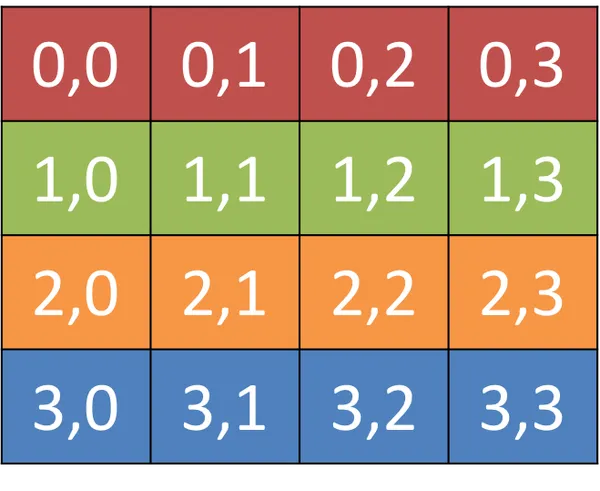

- Example

  ```python
  class MainWindow(QMainWindow):

      def __init__(self):
          super(MainWindow, self).__init__()

          self.setWindowTitle("My App")

          layout = QGridLayout()

          layout.addWidget(Color('red'), 0, 0)
          layout.addWidget(Color('green'), 1, 0)
          layout.addWidget(Color('blue'), 1, 1)
          layout.addWidget(Color('purple'), 2, 1)

          widget = QWidget()
          widget.setLayout(layout)
          self.setCentralWidget(widget)
  ```


## `QStackedLayout`

- As described, this layout allows you to position elements directly in front of one another.
- Note there is also `QStackedWidget` which is a `container widget` that works in exactly the same way.

  - This is useful if you want to add a stack directly to a `QMainWindow` with `.setCentralWidget`.

- `QStackedLayout` — in use **only the uppermost widget is visible**, which is by default the first widget added to the layout.

  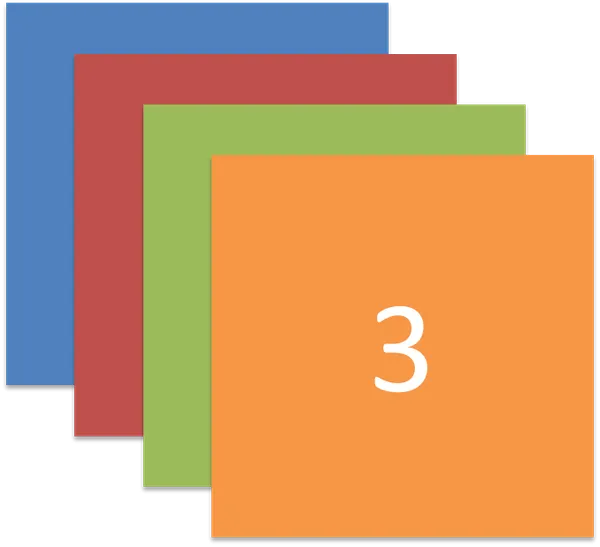

- `QStackedLayout`, with the 2nd (1) widget selected and brought to the front.

  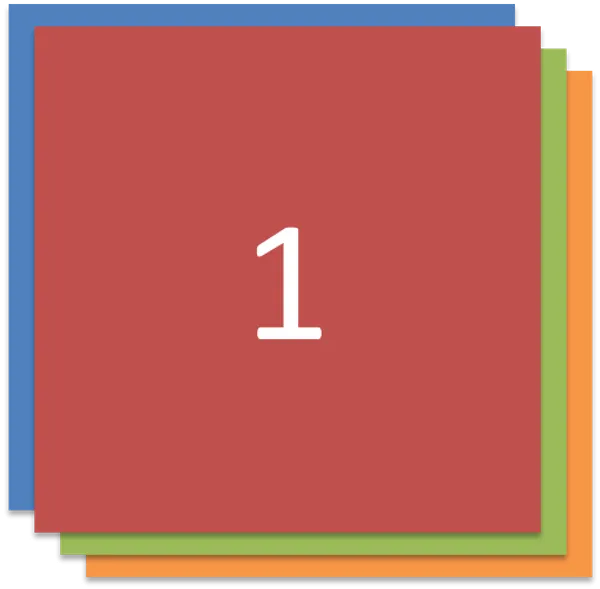

- Example

  - `Qt` actually provide a built-in `TabWidget` that provides this kind of layout out of the box - albeit in widget form. Below the tab demo is recreated using `QTabWidget`
  - You can set the position of the tabs using the cardinal directions, toggle whether tabs are moveable with `.setMoveable`.
  - On `macOS` this is typically used for tabbed configuration panels. For documents, you can turn on `document mode` to give slimline tabs similar to what you see on other platforms.

  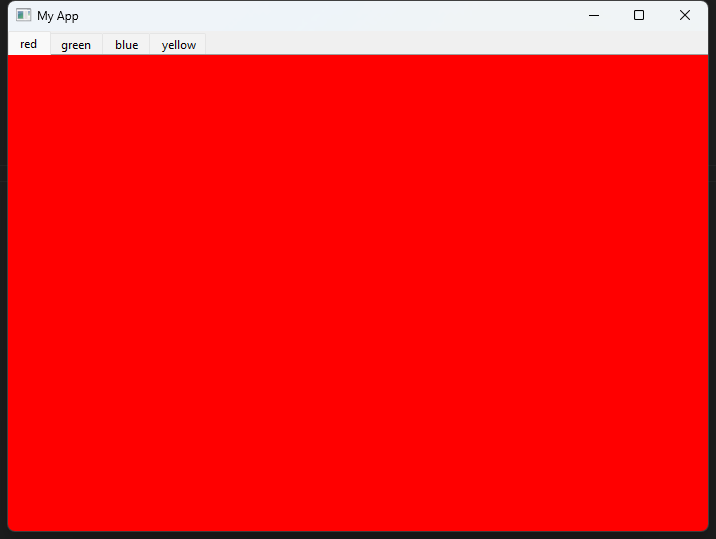

  ```python
  import sys

  from PyQt6.QtGui import QPalette, QColor
  from PyQt6.QtCore import Qt
  from PyQt6.QtWidgets import (
      QApplication,
      QLabel,
      QMainWindow,
      QPushButton,
      QTabWidget,
      QWidget,
  )

  class Color(QWidget):

      def __init__(self, color):
          super(Color, self).__init__()
          self.setAutoFillBackground(True)

          palette = self.palette()
          palette.setColor(QPalette.ColorRole.Window, QColor(color))
          self.setPalette(palette)


  class MainWindow(QMainWindow):
      def __init__(self):
          super().__init__()

          self.setWindowTitle("My App")
          self.setMinimumSize(700,500)

          tabs = QTabWidget()
          tabs.setTabPosition(QTabWidget.TabPosition.North)
          tabs.setDocumentMode(True)
          tabs.setMovable(True)

          for n, color in enumerate(["red", "green", "blue", "yellow"]):
              tabs.addTab(Color(color), color)

          self.setCentralWidget(tabs)


  app = QApplication(sys.argv)

  window = MainWindow()
  window.show()

  app.exec()
  ```
